In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100) 
pd.set_option('display.width', None)

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("="*80)
print("AIRPORT DELAYS ANALYSIS - INITIAL EXPLORATION")
print("="*80)
print("\n✓ Libraries imported successfully!")
print(f"  - Pandas version: {pd.__version__}")
print(f"  - NumPy version: {np.__version__}")
print(f"  - Matplotlib version: {plt.matplotlib.__version__}")
print(f"  - Seaborn version: {sns.__version__}")


AIRPORT DELAYS ANALYSIS - INITIAL EXPLORATION

✓ Libraries imported successfully!
  - Pandas version: 2.3.3
  - NumPy version: 2.0.2
  - Matplotlib version: 3.9.4
  - Seaborn version: 0.13.2


In [2]:
import os

data_path = '../data/raw/flights.csv'

if not os.path.exists(data_path):
    print(f"❌ Data file not found at: {data_path}")
    print("Please ensure the file is in the correct location and try again.")
else:
    print(f"✓ Data file found at: {data_path}")
    print(f" - File size: {os.path.getsize(data_path) / (1024 * 1024):.2f} MB")
    print("\n Loading Data... (this may take a moment)")
    print("Please Wait...")

    df = pd.read_csv(data_path)

    print(f"✓ Data loaded successfully!")
    print("="*80)
    print(f"\nDataset Shape: {df.shape[0]:,} rows x {df.shape[1]} columns")
    print(f" - Memory Usage: {df.memory_usage(deep=True).sum() / (1024 * 1024):.2f} MB")
    print("="*80)

✓ Data file found at: ../data/raw/flights.csv
 - File size: 564.96 MB

 Loading Data... (this may take a moment)
Please Wait...
✓ Data loaded successfully!

Dataset Shape: 5,819,079 rows x 31 columns
 - Memory Usage: 2484.59 MB


In [3]:
print("FIRST 10 ROWS OF THE DATASET:")
print("="*80)
df.head(10)

FIRST 10 ROWS OF THE DATASET:


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,1589,604.0,6.0,602,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19.0,-6.0,11.0,30.0,181.0,170.0,154.0,1299,504.0,5.0,526,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,13.0,57.0,273.0,249.0,228.0,2125,745.0,8.0,803,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33.0,3.0,12.0,45.0,221.0,203.0,186.0,1747,651.0,5.0,711,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("COLUMN INFORMATION:")
print("="*80)
print(f"Total Columns: {len(df.columns)}\n")

print(df.info())

print("\n" + "="*80)
print("COLUMN NAMES:")
print("="*80)
for i, col in enumerate(df.columns):
    print(f"{i:2d}. {col}")

COLUMN INFORMATION:
Total Columns: 31

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float6

In [5]:
print("Missing Values Analysis:")
print("="*80)

missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percent': missing_percent.values
})

missing_df = missing_df[missing_df['Missing_Count']>0]
missing_df = missing_df.sort_values(by='Missing_Percent', ascending=False)

if len(missing_df) == 0:
    print("No missing values found in the dataset!")
else:
    print(f"Found {len(missing_df)} columns with missing values:\n")
    print(missing_df.to_string(index=False))

print("\n" + "="*80)
print(f"Total Missing Values across all columns: {missing_counts.sum():,}")

Missing Values Analysis:
Found 18 columns with missing values:

             Column  Missing_Count  Missing_Percent
CANCELLATION_REASON        5729195        98.455357
      WEATHER_DELAY        4755640        81.724960
LATE_AIRCRAFT_DELAY        4755640        81.724960
      AIRLINE_DELAY        4755640        81.724960
     SECURITY_DELAY        4755640        81.724960
   AIR_SYSTEM_DELAY        4755640        81.724960
       ELAPSED_TIME         105071         1.805629
           AIR_TIME         105071         1.805629
      ARRIVAL_DELAY         105071         1.805629
       ARRIVAL_TIME          92513         1.589822
            TAXI_IN          92513         1.589822
          WHEELS_ON          92513         1.589822
         WHEELS_OFF          89047         1.530259
           TAXI_OUT          89047         1.530259
     DEPARTURE_TIME          86153         1.480526
    DEPARTURE_DELAY          86153         1.480526
        TAIL_NUMBER          14721         0.252978


In [6]:
print("SUMMARY STATISTICS - KEY NUMERICAL COLUMNS:")
print("="*80)

key_cols = ['DEPARTURE DELAY', 'ARRIVAL DELAY', 'DISTANCE', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME']

key_cols = [col for col in key_cols if col in df.columns]

print(df[key_cols].describe())

print("\n" + "="*80)
print("DELAY STATISTICS:")
print("="*80)

if 'ARRIVAL_DELAY' in df.columns:
    delays= df['ARRIVAL_DELAY'].dropna()

    print(f"Total flights with delay data: {len(delays):,}")
    print(f"Mean Delay: {delays.mean():.2f} minutes")
    print(f"Median Delay: {delays.median():.2f} minutes")
    print(f"Standard Deviation: {delays.std():.2f} minutes")
    print(f"\nMin Delay: {delays.min():.2f} minutes (early arrival)")
    print(f"Max Delay: {delays.max():.2f} minutes")

    print("\n" + "="*80)
    print("DELAY DISTRIBUTION:")
    print("="*80)
    on_time = (delays <= 0).sum()
    minor = ((delays > 0) & (delays <= 15)).sum()
    moderate = ((delays > 15) & (delays <= 60)).sum()
    severe = (delays > 60).sum()

    print(f"Early/On-Time (<= 0 min): {on_time:,} flights ({(on_time/len(delays))*100:.2f}%)")
    print(f"Minor Delay (1-15 min): {minor:,} flights ({(minor/len(delays))*100:.2f}%)")
    print(f"Moderate Delay (16-60 min): {moderate:,} flights ({(moderate/len(delays))*100:.2f}%)")
    print(f"Severe Delay (> 60 min): {severe:,} flights ({(severe/len(delays))*100:.2f}%)")

SUMMARY STATISTICS - KEY NUMERICAL COLUMNS:
           DISTANCE  SCHEDULED_TIME  ELAPSED_TIME      AIR_TIME
count  5.819079e+06    5.819073e+06  5.714008e+06  5.714008e+06
mean   8.223565e+02    1.416859e+02  1.370062e+02  1.135116e+02
std    6.077843e+02    7.521058e+01  7.421107e+01  7.223082e+01
min    2.100000e+01    1.800000e+01  1.400000e+01  7.000000e+00
25%    3.730000e+02    8.500000e+01  8.200000e+01  6.000000e+01
50%    6.470000e+02    1.230000e+02  1.180000e+02  9.400000e+01
75%    1.062000e+03    1.730000e+02  1.680000e+02  1.440000e+02
max    4.983000e+03    7.180000e+02  7.660000e+02  6.900000e+02

DELAY STATISTICS:
Total flights with delay data: 5,714,008
Mean Delay: 4.41 minutes
Median Delay: -5.00 minutes
Standard Deviation: 39.27 minutes

Min Delay: -87.00 minutes (early arrival)
Max Delay: 1971.00 minutes

DELAY DISTRIBUTION:
Early/On-Time (<= 0 min): 3,627,112 flights (63.48%)
Minor Delay (1-15 min): 1,063,398 flights (18.61%)
Moderate Delay (16-60 min): 704,406 fl

In [7]:

print("CATEGORICAL COLUMNS ANALYSIS:")
print("="*80)

if 'AIRLINE' in df.columns:
    print(f"\nUnique Airlines: {df['AIRLINE'].nunique()}")
    print("Top 10 airlines by flight count:")
    print(df['AIRLINE'].value_counts().head(10))

if 'ORIGIN_AIRPORT' in df.columns:
    print(f"\n{'-'*80}")
    print(f"Unique Origin Airports: {df['ORIGIN_AIRPORT'].nunique()}")
    print("Top 10 busiest origin airports:")
    print(df['ORIGIN_AIRPORT'].value_counts().head(10))

if 'DAY_OF_WEEK' in df.columns:
    print(f"\n{'-'*80}")
    print("Flights by Day of Week:")
    print(df['DAY_OF_WEEK'].value_counts().sort_index())
    print("\nNote: 1=Monday, 2=Tuesday, ..., 7=Sunday")


if 'MONTH' in df.columns:
    print(f"\n{'-'*80}")
    print("Flights by Month:")
    month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 
                   5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
                   9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    month_counts = df['MONTH'].value_counts().sort_index()
    for month, count in month_counts.items():
        print(f"{month_names.get(month, month):3s}: {count:,}")

CATEGORICAL COLUMNS ANALYSIS:

Unique Airlines: 14
Top 10 airlines by flight count:
AIRLINE
WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
Name: count, dtype: int64

--------------------------------------------------------------------------------
Unique Origin Airports: 930
Top 10 busiest origin airports:
ORIGIN_AIRPORT
ATL    346836
ORD    285884
DFW    239551
DEN    196055
LAX    194673
SFO    148008
PHX    146815
IAH    146622
LAS    133181
MSP    112117
Name: count, dtype: int64

--------------------------------------------------------------------------------
Flights by Day of Week:
DAY_OF_WEEK
1    865543
2    844600
3    855897
4    872521
5    862209
6    700545
7    817764
Name: count, dtype: int64

Note: 1=Monday, 2=Tuesday, ..., 7=Sunday

--------------------------------------------------------------------------------
Flights by Month:
Jan: 469,968
Feb: 429,191
Mar: 504,312
Apr: 485,1

In [8]:


print("FLIGHT CANCELLATIONS ANALYSIS:")
print("="*80)

if 'CANCELLED' in df.columns:
    total_flights = len(df)
    cancelled = df['CANCELLED'].sum()
    cancelled_pct = (cancelled / total_flights) * 100
    
    print(f"Total flights: {total_flights:,}")
    print(f"Cancelled flights: {cancelled:,}")
    print(f"Cancellation rate: {cancelled_pct:.2f}%")
    
    if 'CANCELLATION_REASON' in df.columns:
        print(f"\n{'-'*80}")
        print("Cancellation Reasons:")
        print(df[df['CANCELLED'] == 1]['CANCELLATION_REASON'].value_counts())
        print("\nNote: A=Airline, B=Weather, C=National Air System, D=Security")
else:
    print("No cancellation data available in this dataset")

FLIGHT CANCELLATIONS ANALYSIS:
Total flights: 5,819,079
Cancelled flights: 89,884
Cancellation rate: 1.54%

--------------------------------------------------------------------------------
Cancellation Reasons:
CANCELLATION_REASON
B    48851
A    25262
C    15749
D       22
Name: count, dtype: int64

Note: A=Airline, B=Weather, C=National Air System, D=Security


CREATING VISUALIZATION: Delay Distribution


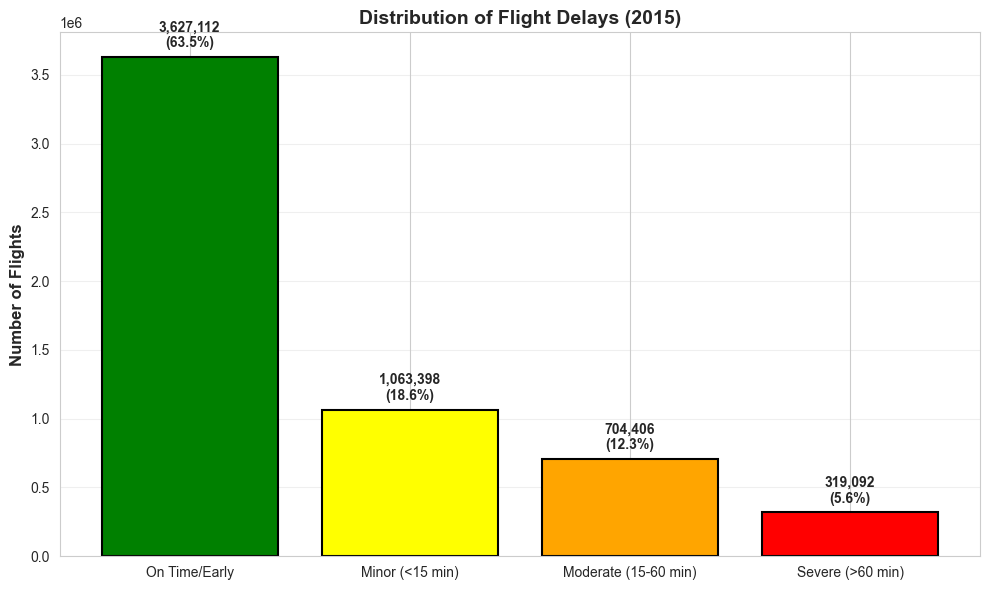

✓ Visualization created successfully!


In [9]:
# Cell 9: Simple visualization of delay distribution

print("CREATING VISUALIZATION: Delay Distribution")
print("="*80)

if 'ARRIVAL_DELAY' in df.columns:
    # Create delay categories
    delays = df['ARRIVAL_DELAY'].dropna()
    
    def categorize_delay(delay):
        if delay <= 0:
            return 'On Time/Early'
        elif delay <= 15:
            return 'Minor (<15 min)'
        elif delay <= 60:
            return 'Moderate (15-60 min)'
        else:
            return 'Severe (>60 min)'
    
    delay_categories = delays.apply(categorize_delay)
    
    # Create plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    category_counts = delay_categories.value_counts()
    category_order = ['On Time/Early', 'Minor (<15 min)', 
                      'Moderate (15-60 min)', 'Severe (>60 min)']
    category_counts = category_counts.reindex(category_order)
    
    colors = ['green', 'yellow', 'orange', 'red']
    bars = ax.bar(range(len(category_counts)), category_counts.values, 
                  color=colors, edgecolor='black', linewidth=1.5)
    
    ax.set_xticks(range(len(category_counts)))
    ax.set_xticklabels(category_counts.index, rotation=0, ha='center')
    ax.set_ylabel('Number of Flights', fontsize=12, fontweight='bold')
    ax.set_title('Distribution of Flight Delays (2015)', 
                 fontsize=14, fontweight='bold')
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, category_counts.values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 50000,
                f'{value:,}\n({value/len(delays)*100:.1f}%)',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("✓ Visualization created successfully!")
else:
    print("Cannot create visualization - ARRIVAL_DELAY column not found")

In [10]:

print("="*80)
print("INITIAL EXPLORATION COMPLETE!")
print("="*80)

print("\nKEY FINDINGS:")
print("-" * 80)

if 'ARRIVAL_DELAY' in df.columns:
    delays = df['ARRIVAL_DELAY'].dropna()
    delayed_flights = (delays > 15).sum()
    delay_rate = (delayed_flights / len(delays)) * 100
    
    print(f"1. Dataset contains {len(df):,} flights from 2015")
    print(f"2. Overall delay rate (>15 min): {delay_rate:.2f}%")
    print(f"3. Average delay: {delays.mean():.2f} minutes")
    
if 'CANCELLED' in df.columns:
    print(f"4. Cancellation rate: {(df['CANCELLED'].sum()/len(df)*100):.2f}%")

if 'AIRLINE' in df.columns:
    print(f"5. Covers {df['AIRLINE'].nunique()} different airlines")

if 'ORIGIN_AIRPORT' in df.columns:
    print(f"6. Includes {df['ORIGIN_AIRPORT'].nunique()} origin airports")

print("\n" + "="*80)
print("NEXT STEPS:")
print("="*80)
print("1. Clean the data (handle missing values)")
print("2. Create derived features (delay categories, time of day)")
print("3. Deep dive analysis by airport, airline, time")
print("4. Create comprehensive visualizations")
print("5. Generate recommendations")

print("\n✓ Notebook 01 complete. Ready for notebook 02 (data cleaning).")

INITIAL EXPLORATION COMPLETE!

KEY FINDINGS:
--------------------------------------------------------------------------------
1. Dataset contains 5,819,079 flights from 2015
2. Overall delay rate (>15 min): 17.91%
3. Average delay: 4.41 minutes
4. Cancellation rate: 1.54%
5. Covers 14 different airlines
6. Includes 930 origin airports

NEXT STEPS:
1. Clean the data (handle missing values)
2. Create derived features (delay categories, time of day)
3. Deep dive analysis by airport, airline, time
4. Create comprehensive visualizations
5. Generate recommendations

✓ Notebook 01 complete. Ready for notebook 02 (data cleaning).


In [11]:
print(df.shape)

(5819079, 31)
